In [1]:
# Importing the necessary packages
import networkx as nx
import csv
import numpy as np
import pandas as pd
import scipy.stats as ss
from scipy.stats.stats import pearsonr
from scipy.stats import linregress
import matplotlib.pyplot as plt
from matplotlib import rcParams
import statsmodels.formula.api as sm
import operator
import random
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

In [2052]:
# Reading the csv that has the nodes and edges
# Setting the names of the vicitims as the fixed index 
victims = pd.read_csv('Madoff matrix.csv', delimiter = ',')
victims = victims.set_index('Banks')

In [2053]:
# Reading the csv that contains the exposure amount for each victim
# Deleting the dollar sign from the column and converting the string of numbers to a float
# Adding the column to the previous csv 
exposure = pd.read_csv('Revised Madoff Exposure Amounts.csv', index_col =0)
exposure = (exposure['Exposure_Amount'].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True ).astype(float))
victims = victims.join(exposure, lsuffix = 'Exposure_Amount')

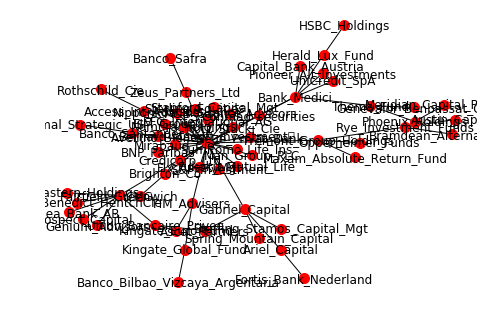

In [2054]:
# Plotting the network
path1 ='/Users/Kylee/Desktop/data/Madoff matrix.csv'

f1 = open(path1, 'rb')

for x in f1:
    t = x.split(',')
    break

g = t[1:]

graph = nx.Graph()
for y in g:
    graph.add_node(y)

count = 0
for i in f1:
    p = i.split(',')
    for m, n in zip(p, t):
        try:
            if int(m) == 1:
                graph.add_edge(p[0], n)
        except ValueError:
            pass

pos = nx.spring_layout(graph, scale=3)
nx.draw(graph, node_size=100, node_color = 'r', with_labels = True)
plt.figure(figsize=(50,50))
plt.show()


In [2055]:
# Finding the shortest path length of each node to Bernard Madoff
path_length = nx.shortest_path_length(graph, target= 'Bernard_Madoff_Investment\r\n')
path_length

{'Access_Int_Advisors': 1,
 'Ariel_Capital': 2,
 'Ascot_Partners': 2,
 'Austin_Capital': 3,
 'Avellino_Bienes': 1,
 'BNP_Paribas': 1,
 'Banco_Bilbao_Vizcaya_Argentaria': 3,
 'Banco_Safra': 2,
 'Banco_Santander': 1,
 'Bank_Medici': 1,
 'Banque_Benedict_HentchCie': 2,
 'Bernard_Madoff_Investment\r\n': 0,
 'Bramdean_Alternatives_Ltd': 3,
 'Brighton_Co': 1,
 'CMG': 2,
 'Capital_Bank_Austria': 2,
 'Cohmad_securities': 1,
 'Credicorp_Ltd': 1,
 'EFG_International_AG': 1,
 'EIM_Group': 1,
 'FIM_Advisers': 1,
 'Fairfield_Greenwich': 1,
 'Fix_Asset_Mgt': 1,
 'Fortis_Bank_Nederland': 3,
 'Fukoku_Mutual_Life': 1,
 'Gabriel_Capital': 1,
 'Genevalor_Benbassat_Cie': 3,
 'Genium_Advisors': 2,
 'Great_Eastern_Holdings': 2,
 'HSBC_Holdings': 3,
 'Herald_Lux_Fund': 2,
 'Kingate_Euro_Fund': 2,
 'Kingate_Global_Fund': 2,
 'M&B_Capital_Advisors': 1,
 'Man_Group_PLC': 1,
 'Maxam_Absolute_Return_Fund': 2,
 'Meridian_Capital_Partners': 3,
 'Mirabaud_Cie': 1,
 'Neue_Privat_Bank': 1,
 'Nipponkoa_Insurance': 1,
 

In [2056]:
# Finding the betweenness centrality of each node
betweenness_centrality = nx.betweenness_centrality(graph)
betweenness_centrality

{'Access_Int_Advisors': 0.03333333333333333,
 'Ariel_Capital': 0.03333333333333333,
 'Ascot_Partners': 0.00423728813559322,
 'Austin_Capital': 0.0,
 'Avellino_Bienes': 0.0,
 'BNP_Paribas': 0.0,
 'Banco_Bilbao_Vizcaya_Argentaria': 0.0,
 'Banco_Safra': 0.0,
 'Banco_Santander': 0.03333333333333333,
 'Bank_Medici': 0.2480225988700565,
 'Banque_Benedict_HentchCie': 0.0,
 'Bernard_Madoff_Investment\r\n': 0.9214689265536723,
 'Bramdean_Alternatives_Ltd': 0.0,
 'Brighton_Co': 0.03333333333333333,
 'CMG': 0.0,
 'Capital_Bank_Austria': 0.0,
 'Cohmad_securities': 0.0,
 'Credicorp_Ltd': 0.0,
 'EFG_International_AG': 0.0,
 'EIM_Group': 0.0,
 'FIM_Advisers': 0.09180790960451977,
 'Fairfield_Greenwich': 0.18587570621468927,
 'Fix_Asset_Mgt': 0.0,
 'Fortis_Bank_Nederland': 0.0,
 'Fukoku_Mutual_Life': 0.0,
 'Gabriel_Capital': 0.15508474576271186,
 'Genevalor_Benbassat_Cie': 0.0,
 'Genium_Advisors': 0.0,
 'Great_Eastern_Holdings': 0.0,
 'HSBC_Holdings': 0.0,
 'Herald_Lux_Fund': 0.03333333333333333,
 'Ki

In [2057]:
# Finding the degree of each node
degree = dict(nx.degree(graph))
degree

{'Access_Int_Advisors': 2,
 'Ariel_Capital': 2,
 'Ascot_Partners': 2,
 'Austin_Capital': 1,
 'Avellino_Bienes': 1,
 'BNP_Paribas': 1,
 'Banco_Bilbao_Vizcaya_Argentaria': 1,
 'Banco_Safra': 1,
 'Banco_Santander': 2,
 'Bank_Medici': 7,
 'Banque_Benedict_HentchCie': 1,
 'Bernard_Madoff_Investment\r\n': 28,
 'Bramdean_Alternatives_Ltd': 1,
 'Brighton_Co': 2,
 'CMG': 1,
 'Capital_Bank_Austria': 1,
 'Cohmad_securities': 2,
 'Credicorp_Ltd': 1,
 'EFG_International_AG': 1,
 'EIM_Group': 1,
 'FIM_Advisers': 3,
 'Fairfield_Greenwich': 7,
 'Fix_Asset_Mgt': 1,
 'Fortis_Bank_Nederland': 1,
 'Fukoku_Mutual_Life': 1,
 'Gabriel_Capital': 5,
 'Genevalor_Benbassat_Cie': 1,
 'Genium_Advisors': 1,
 'Great_Eastern_Holdings': 1,
 'HSBC_Holdings': 1,
 'Herald_Lux_Fund': 2,
 'Kingate_Euro_Fund': 2,
 'Kingate_Global_Fund': 2,
 'M&B_Capital_Advisors': 1,
 'Man_Group_PLC': 1,
 'Maxam_Absolute_Return_Fund': 1,
 'Meridian_Capital_Partners': 1,
 'Mirabaud_Cie': 1,
 'Neue_Privat_Bank': 1,
 'Nipponkoa_Insurance': 1,


In [2058]:
# Adding the respective path lengths to each bank
victims['path_length']= pd.Series(path_length)
victims['betweenness_centrality']= pd.Series(betweenness_centrality)
victims['degree'] = pd.Series(degree)
victims

,HSBC_Holdings,Genevalor_Benbassat_Cie,Phoenix_Holdings,Thema_Fund,Herald_Lux_Fund,Capital_Bank_Austria,Cohmad_securities,Bank_Medici,UniCredit_SpA,Pioneer_Alt_Investments,...,Gabriel_Capital,Sterling_Stamos_Capital_Mgt,Spring_Mountain_Capital,Ariel_Capital,Fortis_Bank_Nederland,Bernard_Madoff_Investment,Exposure_Amount,path_length,betweenness_centrality,degree
Banks,,,,,,,,,,,,,,,,,,,,,
HSBC_Holdings,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1.000000e+09,3.0,0.000000,1.0
Genevalor_Benbassat_Cie,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,9.350000e+08,3.0,0.000000,1.0
Phoenix_Holdings,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1.500000e+07,3.0,0.000000,1.0
Thema_Fund,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1.100000e+09,2.0,0.066102,3.0
Herald_Lux_Fund,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,9.000000e+08,2.0,0.033333,2.0
Capital_Bank_Austria,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1.930000e+07,2.0,0.000000,1.0
Cohmad_securities,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,3.700000e+06,1.0,0.000000,2.0
Bank_Medici,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2.100000e+09,1.0,0.248023,7.0
UniCredit_SpA,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1.010000e+08,2.0,0.000000,2.0


In [2059]:
# Descriptive statistics of all the exposure amounts
victims['Exposure_Amount'].describe()

count    6.000000e+01
mean     6.705514e+08
std      1.181910e+09
min      2.814000e+05
25%      3.875000e+07
50%      2.700000e+08
75%      8.293750e+08
max      7.500000e+09
Name: Exposure_Amount, dtype: float64

In [2060]:
# Average of the shortest path length to Madoff - mean
victims['path_length'].describe()

count    60.000000
mean      1.666667
std       0.705106
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       3.000000
Name: path_length, dtype: float64

In [2061]:
victims['betweenness_centrality'].describe()

count    60.000000
mean      0.021384
std       0.051820
min       0.000000
25%       0.000000
50%       0.000000
75%       0.005579
max       0.248023
Name: betweenness_centrality, dtype: float64

In [2062]:
victims['degree'].describe()

count    60.000000
mean      1.666667
std       1.323409
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       7.000000
Name: degree, dtype: float64

In [2033]:
# Excluding Bernard Madoff in the linear regression
victims1=victims[0:60]
victims1

,HSBC_Holdings,Genevalor_Benbassat_Cie,Phoenix_Holdings,Thema_Fund,Herald_Lux_Fund,Capital_Bank_Austria,Cohmad_securities,Bank_Medici,UniCredit_SpA,Pioneer_Alt_Investments,...,Gabriel_Capital,Sterling_Stamos_Capital_Mgt,Spring_Mountain_Capital,Ariel_Capital,Fortis_Bank_Nederland,Bernard_Madoff_Investment,Exposure_Amount,path_length,betweenness_centrality,degree
Banks,,,,,,,,,,,,,,,,,,,,,
HSBC_Holdings,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1.000000e+09,3.0,0.000000,1.0
Genevalor_Benbassat_Cie,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,9.350000e+08,3.0,0.000000,1.0
Phoenix_Holdings,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1.500000e+07,3.0,0.000000,1.0
Thema_Fund,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1.100000e+09,2.0,0.066102,3.0
Herald_Lux_Fund,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,9.000000e+08,2.0,0.033333,2.0
Capital_Bank_Austria,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1.930000e+07,2.0,0.000000,1.0
Cohmad_securities,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,3.700000e+06,1.0,0.000000,2.0
Bank_Medici,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2.100000e+09,1.0,0.248023,7.0
UniCredit_SpA,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1.010000e+08,2.0,0.000000,2.0


In [2034]:
# Ignoring the outlier: Fairfield Greenwich Group
victims2 = victims[0:27]
victims3 = victims[28:60]
victims4 = victims2.append(victims3)
victims4

,HSBC_Holdings,Genevalor_Benbassat_Cie,Phoenix_Holdings,Thema_Fund,Herald_Lux_Fund,Capital_Bank_Austria,Cohmad_securities,Bank_Medici,UniCredit_SpA,Pioneer_Alt_Investments,...,Gabriel_Capital,Sterling_Stamos_Capital_Mgt,Spring_Mountain_Capital,Ariel_Capital,Fortis_Bank_Nederland,Bernard_Madoff_Investment,Exposure_Amount,path_length,betweenness_centrality,degree
Banks,,,,,,,,,,,,,,,,,,,,,
HSBC_Holdings,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1.000000e+09,3.0,0.000000,1.0
Genevalor_Benbassat_Cie,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,9.350000e+08,3.0,0.000000,1.0
Phoenix_Holdings,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1.500000e+07,3.0,0.000000,1.0
Thema_Fund,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1.100000e+09,2.0,0.066102,3.0
Herald_Lux_Fund,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,9.000000e+08,2.0,0.033333,2.0
Capital_Bank_Austria,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1.930000e+07,2.0,0.000000,1.0
Cohmad_securities,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,3.700000e+06,1.0,0.000000,2.0
Bank_Medici,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2.100000e+09,1.0,0.248023,7.0
UniCredit_SpA,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1.010000e+08,2.0,0.000000,2.0


Linear relationship between exposure amount and path length


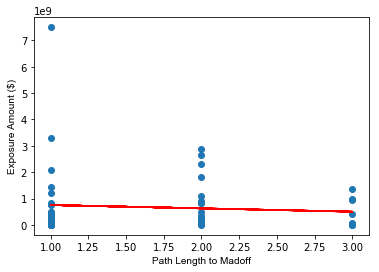

Correlation: (array([-0.07513017]), array([0.56832434]))

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.3292
Date:                Mon, 11 Mar 2019   Prob (F-statistic):              0.568
Time:                        20:14:56   Log-Likelihood:                -1337.9
No. Observations:                  60   AIC:                             2680.
Df Residuals:                      58   BIC:                             2684.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

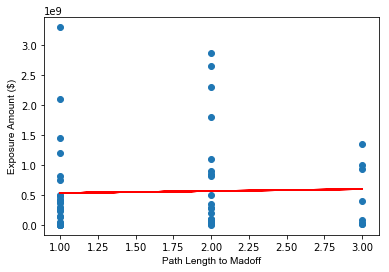


Correlation: (array([0.02944757]), array([0.82478141]))

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                   0.04947
Date:                Mon, 11 Mar 2019   Prob (F-statistic):              0.825
Time:                        20:14:57   Log-Likelihood:                -1290.9
No. Observations:                  59   AIC:                             2586.
Df Residuals:                      57   BIC:                             2590.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [2035]:
# Exposure amount vs. path length

# Plotting the linear regression of exposure amount and path length
Y = victims1['Exposure_Amount'].values.reshape(-1, 1)
X = victims1['path_length'].values.reshape(-1, 1)
model = ols("Y ~ X", victims1).fit()
# The Pearson correlation coefficient measures the linear relationship between two datasets. Strictly speaking, Pearson's correlation requires
# that each dataset be normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no
# correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does
# y. Negative correlations imply that as x increases, y decreases.
# The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme
# as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so.
correlation = pearsonr(X,Y)
print 'Linear relationship between exposure amount and path length'
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
hfont = {'fontname':'Arial'}
plt.plot(X, Y_pred, color='red')
plt.ylabel('Exposure Amount ($)', **hfont)
plt.xlabel('Path Length to Madoff', **hfont)
plt.savefig('exposurepathlength1.png', bbox_inches='tight')
plt.show()
print "Correlation:", correlation
print ''
print(model.summary())


# Plotting the linear regression of exposure amount and path length WITHOUT OUTLIER
Y = victims4['Exposure_Amount'].values.reshape(-1, 1)
X = victims4['path_length'].values.reshape(-1, 1)
model = ols("Y ~ X", victims4).fit()
correlation = pearsonr(X,Y)
print'Linear relationship between exposure amount and path length without the outlier'
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
hfont = {'fontname':'Arial'}
plt.plot(X, Y_pred, color='red')
plt.ylabel('Exposure Amount ($)', **hfont)
plt.xlabel('Path Length to Madoff', **hfont)
plt.savefig('exposurepathlength2.png', bbox_inches='tight')
plt.show()
print ''
print "Correlation:", correlation
print ''
print(model.summary())

Linear relationship between exposure amount and betweenness centrality of a node


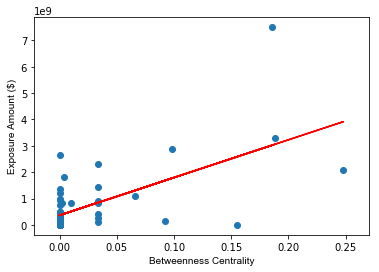

Correlation: (array([0.62815291]), array([7.75396511e-08]))

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     37.80
Date:                Mon, 11 Mar 2019   Prob (F-statistic):           7.75e-08
Time:                        20:14:57   Log-Likelihood:                -1323.0
No. Observations:                  60   AIC:                             2650.
Df Residuals:                      58   BIC:                             2654.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

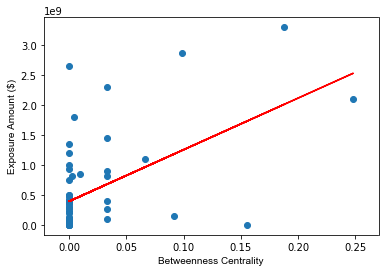

Correlation: (array([0.52679685]), array([1.81811536e-05]))

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     21.89
Date:                Mon, 11 Mar 2019   Prob (F-statistic):           1.82e-05
Time:                        20:14:58   Log-Likelihood:                -1281.4
No. Observations:                  59   AIC:                             2567.
Df Residuals:                      57   BIC:                             2571.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [2036]:
# Exposure amount vs. Betweenness centrality of a node

# Plotting the linear regression of exposure amount and betweenness centrality
Y = victims1['Exposure_Amount'].values.reshape(-1, 1)
X = victims1['betweenness_centrality'].values.reshape(-1, 1)
model = ols("Y ~ X", victims1).fit()
correlation = pearsonr(X,Y)
print'Linear relationship between exposure amount and betweenness centrality of a node'
linear_regressor = LinearRegression()  
linear_regressor.fit(X, Y)  
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
hfont = {'fontname':'Arial'}
plt.plot(X, Y_pred, color='red')
plt.ylabel('Exposure Amount ($)', ** hfont)
plt.xlabel('Betweenness Centrality', **hfont)
plt.savefig('exposurebetweenness1.png', bbox_inches='tight')
plt.show()
print "Correlation:", correlation
print ''
print(model.summary())


# Plotting the linear regression of exposure amount and betweenness centrality WITHOUT OUTLIER
Y = victims4['Exposure_Amount'].values.reshape(-1, 1)
X = victims4['betweenness_centrality'].values.reshape(-1, 1)
model = ols("Y ~ X", victims4).fit()
correlation = pearsonr(X,Y)
print 'Linear relationship between exposure amount and betweenness centrality of a node without the outlier'
linear_regressor = LinearRegression()  
linear_regressor.fit(X, Y)  
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.ylabel('Exposure Amount ($)', **hfont)
plt.xlabel('Betweenness Centrality', **hfont)
plt.savefig('exposurebetweenness2.png', bbox_inches='tight')
print ''
plt.show()
print "Correlation:", correlation
print ''
print(model.summary())

Linear relationship between exposure amount and degree of a node


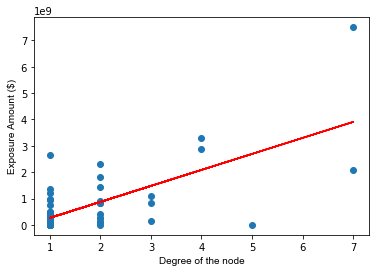

Correlation: (array([0.67976617]), array([2.33719788e-09]))

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     49.82
Date:                Mon, 11 Mar 2019   Prob (F-statistic):           2.34e-09
Time:                        20:14:58   Log-Likelihood:                -1319.5
No. Observations:                  60   AIC:                             2643.
Df Residuals:                      58   BIC:                             2647.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

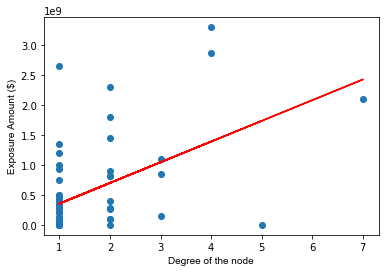

Correlation: (array([0.50353504]), array([4.79843754e-05]))

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     19.36
Date:                Mon, 11 Mar 2019   Prob (F-statistic):           4.80e-05
Time:                        20:14:58   Log-Likelihood:                -1282.3
No. Observations:                  59   AIC:                             2569.
Df Residuals:                      57   BIC:                             2573.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [2037]:
# Exposure amount vs. Degree of a node

# Plotting the linear regression of exposure amount and degree
Y = victims1['Exposure_Amount'].values.reshape(-1, 1)
X = victims1['degree'].values.reshape(-1, 1)
model = ols("Y ~ X", victims1).fit()
correlation = pearsonr(X,Y)
print 'Linear relationship between exposure amount and degree of a node'
linear_regressor = LinearRegression()  
linear_regressor.fit(X, Y)  
Y_pred = linear_regressor.predict(X)
hfont = {'fontname':'Arial'}
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.ylabel('Exposure Amount ($)', **hfont)
plt.xlabel('Degree of the node',  **hfont)
plt.savefig('exposuredegree1.png', bbox_inches='tight')
plt.show()
print "Correlation:", correlation
print ''
print(model.summary())


# Plotting the linear regression of exposure amount and degree WITHOUT OUTLIER
Y = victims4['Exposure_Amount'].values.reshape(-1, 1)
X = victims4['degree'].values.reshape(-1, 1)
model = ols("Y ~ X", victims4).fit()
correlation = pearsonr(X,Y)
print 'Linear relationship between exposure amount and degree of a node without the outlier'
linear_regressor = LinearRegression()  
linear_regressor.fit(X, Y)  
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
hfont = {'fontname':'Arial'}
plt.plot(X, Y_pred, color='red')
plt.ylabel('Exposure Amount ($)', **hfont)
plt.xlabel('Degree of the node', **hfont)
plt.savefig('exposuredegree2.png', bbox_inches='tight')
print ''
plt.show()
print "Correlation:", correlation
print ''
print(model.summary())

** Node Degrees**

In [2038]:
# Method 1 of displaying nodes, degrees
d = dict(graph.degree())
sorted_by_degree = sorted(d.items(), key=operator.itemgetter(1))
sorted_by_degree

[('Notz_Stucki_Cie', 1),
 ('Stanford_Capital_Mgt', 1),
 ('Nomura_Holdings', 1),
 ('CMG', 1),
 ('Sumitomo_Life_Ins', 1),
 ('Fortis_Bank_Nederland', 1),
 ('Opperheimer_Funds', 1),
 ('Genium_Advisors', 1),
 ('Capital_Bank_Austria', 1),
 ('Rothschild_Cie', 1),
 ('EFG_International_AG', 1),
 ('Sterling_Equities', 1),
 ('Optimal_Strategic_US', 1),
 ('Nordea_Bank_AB', 1),
 ('Meridian_Capital_Partners', 1),
 ('BNP_Paribas', 1),
 ('Nipponkoa_Insurance', 1),
 ('HSBC_Holdings', 1),
 ('S&P_Investment', 1),
 ('Great_Eastern_Holdings', 1),
 ('Fukoku_Mutual_Life', 1),
 ('Credicorp_Ltd', 1),
 ('Neue_Privat_Bank', 1),
 ('Man_Group_PLC', 1),
 ('Maxam_Absolute_Return_Fund', 1),
 ('Phoenix_Holdings', 1),
 ('Austin_Capital', 1),
 ('Mirabaud_Cie', 1),
 ('Prospect_Capital', 1),
 ('Banco_Bilbao_Vizcaya_Argentaria', 1),
 ('M&B_Capital_Advisors', 1),
 ('Bramdean_Alternatives_Ltd', 1),
 ('Avellino_Bienes', 1),
 ('Spring_Mountain_Capital', 1),
 ('Banque_Benedict_HentchCie', 1),
 ('Banco_Safra', 1),
 ('Sterling_St

In [2039]:
list(graph.neighbors('Bank_Medici'))

['Capital_Bank_Austria',
 'Bernard_Madoff_Investment\r\n',
 'Cohmad_securities',
 'Thema_Fund',
 'UniCredit_SpA',
 'Herald_Lux_Fund',
 'Pioneer_Alt_Investments']

In [2040]:
# Method 2 of displaying nodes, degrees
for key, value in sorted(d.iteritems(), key=lambda (k,v): (v,k)):
    print "%s: %s" % (key, value)

Austin_Capital: 1
Avellino_Bienes: 1
BNP_Paribas: 1
Banco_Bilbao_Vizcaya_Argentaria: 1
Banco_Safra: 1
Banque_Benedict_HentchCie: 1
Bramdean_Alternatives_Ltd: 1
CMG: 1
Capital_Bank_Austria: 1
Credicorp_Ltd: 1
EFG_International_AG: 1
EIM_Group: 1
Fix_Asset_Mgt: 1
Fortis_Bank_Nederland: 1
Fukoku_Mutual_Life: 1
Genevalor_Benbassat_Cie: 1
Genium_Advisors: 1
Great_Eastern_Holdings: 1
HSBC_Holdings: 1
M&B_Capital_Advisors: 1
Man_Group_PLC: 1
Maxam_Absolute_Return_Fund: 1
Meridian_Capital_Partners: 1
Mirabaud_Cie: 1
Neue_Privat_Bank: 1
Nipponkoa_Insurance: 1
Nomura_Holdings: 1
Nordea_Bank_AB: 1
Notz_Stucki_Cie: 1
Opperheimer_Funds: 1
Optimal_Strategic_US: 1
Phoenix_Holdings: 1
Prospect_Capital: 1
Rothschild_Cie: 1
S&P_Investment: 1
Spring_Mountain_Capital: 1
Stanford_Capital_Mgt: 1
Sterling_Equities: 1
Sterling_Stamos_Capital_Mgt: 1
Sumitomo_Life_Ins: 1
Access_Int_Advisors: 2
Ariel_Capital: 2
Ascot_Partners: 2
Banco_Santander: 2
Brighton_Co: 2
Cohmad_securities: 2
Herald_Lux_Fund: 2
Kingate_Eu

**Graph Theory Measures**

In [2041]:
print "For the original graph,"
# Edges and Nodes
edges = float(nx.number_of_edges(graph))
nodes = float(nx.number_of_nodes(graph))
print "Edges:", edges
print "Nodes:", nodes

# Average shortest path length
shortest_path = nx.average_shortest_path_length(graph)
print "Average shortest path length:", shortest_path

# Beta index = No. of edges / No. of nodes
beta_index = edges / nodes
print "Beta index:", beta_index

# Density
density = nx.density(graph)
print "Density:", density

For the original graph,
Edges: 64.0
Nodes: 61.0
Average shortest path length: 3.13224043716
Beta index: 1.04918032787
Alpha index: 0.00225988700565
Density: 0.0349726775956


**Node Removal #1**

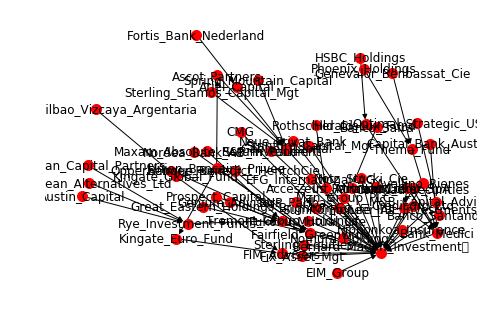

In [2042]:
# Plotting the network Graph 1 for node removal 1
path2 ='/Users/Kylee/Desktop/data/Madoff matrix.csv'

f2 = open(path2, 'rb')

for x in f2:
    t1 = x.split(',')
    break

g2 = t1[1:]

graph1 = nx.DiGraph()
for y in g2:
    graph1.add_node(y)

count = 0
for i in f2:
    p = i.split(',')
    for m, n in zip(p, t):
        try:
            if int(m) == 1:
                graph1.add_edge(p[0], n)
        except ValueError:
            pass

pos = nx.spring_layout(graph1, scale=3)
nx.draw(graph1, node_size=100, node_color = 'r', with_labels = True)
plt.figure(figsize=(50,50))
plt.show()

In [2043]:
# In-degree centrality
indc = nx.in_degree_centrality(graph1) 
print "The in-degree centrality:", indc
print ''
# Out-degree centrality
outdc = nx.out_degree_centrality(graph1)
print "The out-degree centrality:", outdc


The in-degree centrality: {'Notz_Stucki_Cie': 0.0, 'Stanford_Capital_Mgt': 0.0, 'Nomura_Holdings': 0.0, 'Rye_Investment_Funds': 0.05, 'CMG': 0.0, 'Tremont_Group_Holdings': 0.05, 'Banco_Santander': 0.016666666666666666, 'Zeus_Partners_Ltd': 0.016666666666666666, 'Thema_Fund': 0.03333333333333333, 'Access_Int_Advisors': 0.016666666666666666, 'Sumitomo_Life_Ins': 0.0, 'Fortis_Bank_Nederland': 0.0, 'Opperheimer_Funds': 0.0, 'Pioneer_Alt_Investments': 0.016666666666666666, 'FIM_Advisers': 0.03333333333333333, 'Herald_Lux_Fund': 0.016666666666666666, 'Genium_Advisors': 0.0, 'Capital_Bank_Austria': 0.0, 'Rothschild_Cie': 0.0, 'Union_Bancaire_Privee': 0.0, 'EFG_International_AG': 0.0, 'Bank_Medici': 0.1, 'Fairfield_Greenwich': 0.1, 'Sterling_Equities': 0.0, 'Optimal_Strategic_US': 0.0, 'Nordea_Bank_AB': 0.0, 'Meridian_Capital_Partners': 0.0, 'Kingate_Euro_Fund': 0.016666666666666666, 'BNP_Paribas': 0.0, 'Nipponkoa_Insurance': 0.0, 'HSBC_Holdings': 0.0, 'S&P_Investment': 0.0, 'Great_Eastern_Hol

In [2044]:
# Removing the 5 nodes with the highest degrees
Medici = list(graph1.predecessors('Bank_Medici'))
graph1.remove_nodes_from(Medici)
graph1.remove_node('Bank_Medici')

Fairfield = list(graph1.predecessors('Fairfield_Greenwich'))
graph1.remove_nodes_from(Fairfield)
graph1.remove_node('Fairfield_Greenwich')

Gabriel = list(graph1.predecessors('Gabriel_Capital'))
graph1.remove_nodes_from(Gabriel)
graph1.remove_node('Gabriel_Capital')

# Automatically removes Rye Investment
Tremont = list(graph1.predecessors('Tremont_Group_Holdings'))
graph1.remove_nodes_from(Tremont)
graph1.remove_node('Tremont_Group_Holdings')

In [2045]:
graph1.remove_nodes_from(list(nx.isolates(graph1)))
for node in graph1.nodes :
                         print node

Notz_Stucki_Cie
Nomura_Holdings
S&P_Investment
CMG
Banco_Santander
Zeus_Partners_Ltd
Sumitomo_Life_Ins
FIM_Advisers
Banco_Bilbao_Vizcaya_Argentaria
Rothschild_Cie
EFG_International_AG
Optimal_Strategic_US
Sterling_Equities
Mirabaud_Cie
Kingate_Euro_Fund
BNP_Paribas
M&B_Capital_Advisors
Neue_Privat_Bank
Kingate_Global_Fund
Brighton_Co
Stanford_Capital_Mgt
Fukoku_Mutual_Life
Fix_Asset_Mgt
Credicorp_Ltd
Bernard_Madoff_Investment

Access_Int_Advisors
Avellino_Bienes
Nipponkoa_Insurance
Banco_Safra
Man_Group_PLC
EIM_Group


In [2046]:
print "For the node removal strategy #1 graph:"

# Edges and Nodes
edges1 = float(nx.number_of_edges(graph1))
print "Edges:", edges1
nodes1 = float(nx.number_of_nodes(graph1))
print "Nodes:", nodes1

# Beta index
beta_index1 = edges1 / nodes1
print "Beta index:", beta_index1

# Density
density = nx.density(graph1)
print "Density:", density

p = nx.average_shortest_path_length(graph1)
print "Average shortest path length:", p

For the node removal strategy #1 graph:
Edges: 30.0
Nodes: 31.0
Beta index: 0.967741935484
Alpha index: 0.0
Density: 0.0322580645161
Average shortest path length: 0.0505376344086


**Node Removal #2**

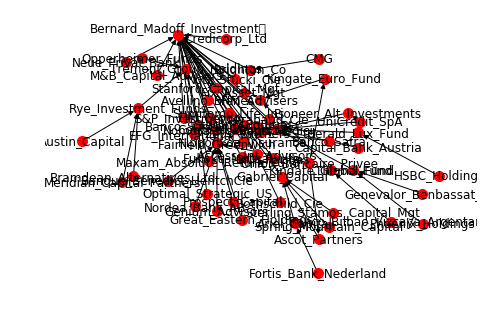

In [2047]:
# Plotting the network Graph 2a for node removal 2
path3 ='/Users/Kylee/Desktop/data/Madoff matrix.csv'

f3 = open(path3, 'rb')

for x in f3:
    t1 = x.split(',')
    break

g3 = t1[1:]

graph2a = nx.DiGraph()
for y in g3:
    graph2a.add_node(y)

count = 0
for i in f3:
    p = i.split(',')
    for m, n in zip(p, t):
        try:
            if int(m) == 1:
                graph2a.add_edge(p[0], n)
        except ValueError:
            pass

pos = nx.spring_layout(graph2a, scale=3)
nx.draw(graph2a, node_size=100, node_color = 'r', with_labels = True)
plt.figure(figsize=(50,50))
plt.show()

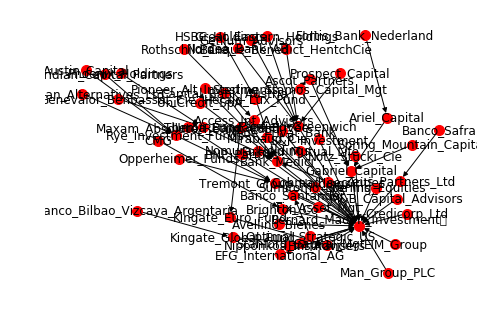

In [2048]:
# Plotting the network Graph 2b for node removal 2
path3 ='/Users/Kylee/Desktop/data/Madoff matrix.csv'

f3 = open(path3, 'rb')

for x in f3:
    t1 = x.split(',')
    break

g3 = t1[1:]

graph2b = nx.DiGraph()
for y in g3:
    graph2b.add_node(y)

count = 0
for i in f3:
    p = i.split(',')
    for m, n in zip(p, t):
        try:
            if int(m) == 1:
                graph2b.add_edge(p[0], n)
        except ValueError:
            pass

pos = nx.spring_layout(graph2b, scale=3)
nx.draw(graph2b, node_size=100, node_color = 'r', with_labels = True)
plt.figure(figsize=(50,50))
plt.show()

In [2049]:
graph2b.nodes()
graph2b.remove_node('Bernard_Madoff_Investment\r\n')
nodes2 = nx.number_of_nodes(graph2b)
nodes2

60

In [337]:
# Repeat this from 1 until network becomes 0
x = 0
z = 0
n = 0
p = 0
edg = 0
import copy
nodes1 = list(graph2b.nodes())
graph_original = graph2a
for i in range(0,1):
    graph2a = graph_original.copy()
    a = random.sample(nodes1,5)
    print a
    b = graph2b.predecessors(a[0])
    c = graph2b.predecessors(a[1])
    d = graph2b.predecessors(a[2])
    e = graph2b.predecessors(a[3])
    f = graph2b.predecessors(a[4])
    print b 
    graph2a.remove_nodes_from(a)
    graph2a.remove_nodes_from(b)
    graph2a.remove_nodes_from(c)
    graph2a.remove_nodes_from(d)
    graph2a.remove_nodes_from(e)
    graph2a.remove_nodes_from(f)
    graph2a.remove_nodes_from(list(nx.isolates(graph2a)))
    edges2 = (nx.number_of_edges(graph2a))
    edg = edg + edges2
    print edges2
    nodes2 = nx.number_of_nodes(graph2a)
    n = n + nodes2
    print nodes2
    if nodes2 == 0 or edges2 == 0:
        break
    else:
        # beta index
        beta_index2 = edges2 / nodes2
        beta_index2 = float(beta_index2)
        x = x + beta_index2
        # density
        z = z + nx.density(graph2a)
        p = p + nx.average_shortest_path_length(graph2a)

print "For the node removal strategy #2 graph:"
print "The average number of nodes remaining:", n/100
print "The average number of edges remaining", edg/100
print "Beta index:", x/100
print "Density:", z/100
print "Average shortest path length:", p/100

['Genium_Advisors', 'Union_Bancaire_Privee', 'Tremont_Group_Holdings', 'Great_Eastern_Holdings', 'BNP_Paribas']
<dictionary-keyiterator object at 0x10efa7520>
51
50
For the node removal strategy #2 graph:
The average number of nodes remaining: 0
The average number of edges remaining 0
Beta index: 0.01
Density: 0.000208163265306
Average shortest path length: 0.000457142857143


In [104]:
d2 = graph2a.degree()
sorted_by_degree2 = sorted(d2.items(), key=operator.itemgetter(1))
sorted_by_degree2

[('Notz_Stucki_Cie', 1),
 ('Nomura_Holdings', 1),
 ('CMG', 1),
 ('Sumitomo_Life_Ins', 1),
 ('Fortis_Bank_Nederland', 1),
 ('Opperheimer_Funds', 1),
 ('Pioneer_Alt_Investments', 1),
 ('Capital_Bank_Austria', 1),
 ('Banco_Bilbao_Vizcaya_Argentaria', 1),
 ('Rothschild_Cie', 1),
 ('EFG_International_AG', 1),
 ('Sterling_Stamos_Capital_Mgt', 1),
 ('Optimal_Strategic_US', 1),
 ('Sterling_Equities', 1),
 ('Nordea_Bank_AB', 1),
 ('BNP_Paribas', 1),
 ('HSBC_Holdings', 1),
 ('S&P_Investment', 1),
 ('Great_Eastern_Holdings', 1),
 ('Bramdean_Alternatives_Ltd', 1),
 ('Neue_Privat_Bank', 1),
 ('Maxam_Absolute_Return_Fund', 1),
 ('Phoenix_Holdings', 1),
 ('Austin_Capital', 1),
 ('Ascot_Partners', 1),
 ('Mirabaud_Cie', 1),
 ('Prospect_Capital', 1),
 ('Fukoku_Mutual_Life', 1),
 ('Genevalor_Benbassat_Cie', 1),
 ('M&B_Capital_Advisors', 1),
 ('Credicorp_Ltd', 1),
 ('Avellino_Bienes', 1),
 ('Spring_Mountain_Capital', 1),
 ('Banque_Benedict_HentchCie', 1),
 ('Nipponkoa_Insurance', 1),
 ('Banco_Safra', 1),


** Node Removal #3**

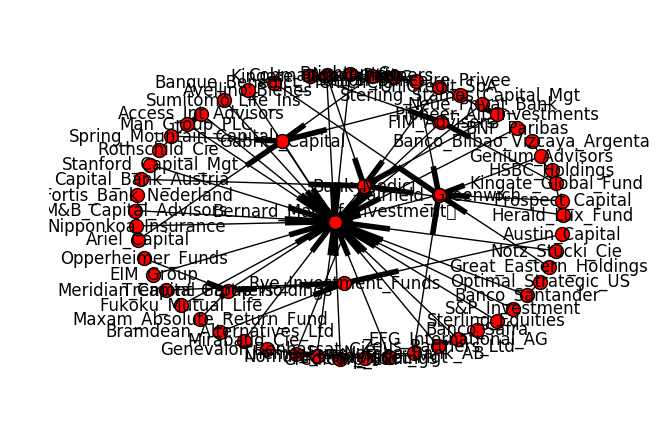

In [105]:
# Plotting the network Graph 3 for node removal 3
path3 ='/Users/Kylee/Desktop/data/Madoff matrix.csv'

f4 = open(path3, 'rb')

for x in f4:
    t3 = x.split(',')
    break

g4 = t3[1:]

graph3 = nx.DiGraph()
for y in g4:
    graph3.add_node(y)

count = 0
for i in f4:
    p = i.split(',')
    for m, n in zip(p, t):
        try:
            if int(m) == 1:
                graph3.add_edge(p[0], n)
        except ValueError:
            pass

pos = nx.spring_layout(graph3, scale=3)
nx.draw(graph3, node_size=100, node_color = 'r', with_labels = True)
plt.figure(figsize=(50,50))
plt.show()

In [106]:
# Removing the 5 nodes with the highest exposure amounts

Optimal = list(graph3.predecessors('Optimal_Strategic_US'))
graph3.remove_nodes_from(Optimal)
graph3.remove_node('Optimal_Strategic_US')

Fairfield = list(graph3.predecessors('Fairfield_Greenwich'))
graph3.remove_nodes_from(Fairfield)
graph3.remove_node('Fairfield_Greenwich')

Kingate = list(graph3.predecessors('Kingate_Global_Fund'))
graph3.remove_nodes_from(Kingate)
graph3.remove_node('Kingate_Global_Fund')

# Automatically removes Rye Investment
Tremont = list(graph3.predecessors('Tremont_Group_Holdings'))
graph3.remove_nodes_from(Tremont)
graph3.remove_node('Tremont_Group_Holdings')


In [107]:
graph_removal3 = graph3
graph3.remove_nodes_from(nx.isolates(graph3))
graph_removal3.nodes()

['Notz_Stucki_Cie',
 'Nomura_Holdings',
 'S&P_Investment',
 'CMG',
 'Banco_Santander',
 'Zeus_Partners_Ltd',
 'Thema_Fund',
 'Sumitomo_Life_Ins',
 'Fortis_Bank_Nederland',
 'Pioneer_Alt_Investments',
 'FIM_Advisers',
 'Capital_Bank_Austria',
 'Rothschild_Cie',
 'EFG_International_AG',
 'Bank_Medici',
 'Sterling_Equities',
 'Mirabaud_Cie',
 'Kingate_Euro_Fund',
 'BNP_Paribas',
 'Ariel_Capital',
 'HSBC_Holdings',
 'M&B_Capital_Advisors',
 'Neue_Privat_Bank',
 'Cohmad_securities',
 'Brighton_Co',
 'Phoenix_Holdings',
 'Ascot_Partners',
 'Stanford_Capital_Mgt',
 'Gabriel_Capital',
 'Fukoku_Mutual_Life',
 'Genevalor_Benbassat_Cie',
 'Spring_Mountain_Capital',
 'Fix_Asset_Mgt',
 'Credicorp_Ltd',
 'Bernard_Madoff_Investment\r\n',
 'Access_Int_Advisors',
 'Avellino_Bienes',
 'Sterling_Stamos_Capital_Mgt',
 'UniCredit_SpA',
 'Nipponkoa_Insurance',
 'Banco_Safra',
 'Man_Group_PLC',
 'Herald_Lux_Fund',
 'EIM_Group']

In [108]:
# Node removal strategy #3
print "For the node removal strategy #3 graph:"

# Edges and Nodes
edges3 = float(nx.number_of_edges(graph_removal3))
nodes3 = float(nx.number_of_nodes(graph_removal3))
print "Edges:", edges3
print "Nodes:", nodes3

# Beta index
beta_index3 = edges3 / nodes3
print "Beta index:", beta_index3

# Density
density = nx.density(graph3)
print "Density:", density

p = nx.average_shortest_path_length(graph3)
print "Average shortest path length:", p

For the node removal strategy #3 graph:
Edges: 45.0
Nodes: 44.0
Beta index: 1.02272727273
Alpha index: 0.00221483942414
Density: 0.0237843551797
Average shortest path length: 0.0480972515856


In [109]:
d3 = graph_removal3.degree()
sorted_by_degree3 = sorted(d3.items(), key=operator.itemgetter(1))
sorted_by_degree3

[('Notz_Stucki_Cie', 1),
 ('Nomura_Holdings', 1),
 ('CMG', 1),
 ('Banco_Santander', 1),
 ('Sumitomo_Life_Ins', 1),
 ('Fortis_Bank_Nederland', 1),
 ('Capital_Bank_Austria', 1),
 ('Rothschild_Cie', 1),
 ('EFG_International_AG', 1),
 ('Sterling_Equities', 1),
 ('Mirabaud_Cie', 1),
 ('Kingate_Euro_Fund', 1),
 ('BNP_Paribas', 1),
 ('Nipponkoa_Insurance', 1),
 ('HSBC_Holdings', 1),
 ('S&P_Investment', 1),
 ('Neue_Privat_Bank', 1),
 ('Man_Group_PLC', 1),
 ('Phoenix_Holdings', 1),
 ('Ascot_Partners', 1),
 ('Stanford_Capital_Mgt', 1),
 ('Fukoku_Mutual_Life', 1),
 ('M&B_Capital_Advisors', 1),
 ('Credicorp_Ltd', 1),
 ('Avellino_Bienes', 1),
 ('Spring_Mountain_Capital', 1),
 ('Banco_Safra', 1),
 ('Sterling_Stamos_Capital_Mgt', 1),
 ('Genevalor_Benbassat_Cie', 1),
 ('EIM_Group', 1),
 ('Fix_Asset_Mgt', 1),
 ('Zeus_Partners_Ltd', 2),
 ('Pioneer_Alt_Investments', 2),
 ('FIM_Advisers', 2),
 ('Herald_Lux_Fund', 2),
 ('Cohmad_securities', 2),
 ('Access_Int_Advisors', 2),
 ('Brighton_Co', 2),
 ('UniCredit

** Progressive removal of nodes graphs**

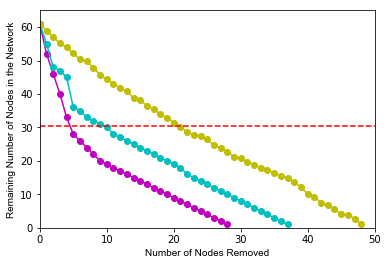

In [2]:
# Remaining size of network: Progressive removal of nodes
# Purple: degree centrality, Blue: exposure amount, Yellow: Random
plt.plot([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28], [61,52,46,40,33,28,26,24,22,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1], '-mo')
plt.plot([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37], [61,55,48,47,45,36,35,33,32,31,30,28,27,26,25,24,23,22,21,20,19,18,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1], '-co')
plt.plot([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48], [61,58.88,57.01,55.15,54,52.12,50.35,49.74,47.87,45.65,44.44,43.1,41.67,40.9,38.68,38.18,36.42,35.5,33.89,32.92,31.47,30.18,28.66,27.74,27.5,26.5,24.62,23.97,22.69,21.25,20.76,19.78,18.81,18,17.29,16.35,15.47,14.89,13.67,12.15,10.1,9.27,7.48,6.92,5.54,4.16,3.89,2.78,1.15], '-yo')
plt.plot([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50], [30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5], '--r')
hfont = {'fontname':'Arial'}
plt.ylabel('Remaining Number of Nodes in the Network',**hfont)
plt.xlabel('Number of Nodes Removed',**hfont)
plt.axis([0, 50, 0, 65])
plt.savefig('combined_noderemoval.png', bbox_inches='tight')
plt.show()

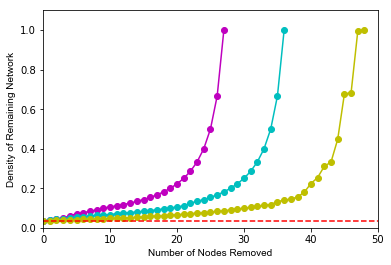

In [3]:
# Density: Progressive removal of nodes
# Purple: degree centrality, Blue: exposure amount, Yellow: Random
plt.plot([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27], [0.0333,0.039969834,0.044444444,0.05,0.060606061,0.071428571,0.076923077,0.083333333,0.090909091,0.1,0.105263158,0.111111111,0.117647059,0.125,0.133333333,0.142857143,0.153846154,0.166666667,0.181818182,0.2,0.222222222,0.25,0.285714286,0.333333333,0.4,0.5,0.666666667,1], '-mo')
plt.plot([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36], [0.0333,0.038383838,0.044326241,0.0453284,0.047474747,0.057142857,0.057142857,0.060606061,0.0625,0.064516129,0.066666667,0.071428571,0.074074074,0.076923077,0.08,0.083333333,0.086956522,0.090909091,0.095238095,0.1,0.105263158,0.111111111,0.125,0.133333333,0.142857143,0.153846154,0.166666667,0.181818182,0.2,0.222222222,0.25,0.285714286,0.333333333,0.4,0.5,0.666666667,1], '-co')
plt.plot([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48], [0.0333,0.036168112,0.037254981,0.038441286,0.039098532,0.040474792,0.041991772,0.042469508,0.044088541,0.045852554,0.047169772,0.048464875,0.05023842,0.051142526,0.053901905,0.054426373,0.057193958,0.058395591,0.060719042,0.062751807,0.065972052,0.068403833,0.071600165,0.073850624,0.07464837,0.077809841,0.083195133,0.085253861,0.090623496,0.095744372,0.098435562,0.103373531,0.108177135,0.113071895,0.117733063,0.13164789,0.140539975,0.144471988,0.156121084,0.17966746,0.223697095,0.254099441,0.311117713,0.332467583,0.447685237,0.677032619,0.683146387,0.994941261,1.00220635], '-yo')
plt.plot([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50], [0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333], '--r')
hfont = {'fontname':'Arial'}
plt.ylabel('Density of Remaining Network',**hfont)
plt.xlabel('Number of Nodes Removed',**hfont)
plt.axis([0, 50, 0, 1.1])
plt.savefig('combined_noderemoval_density.png', bbox_inches='tight')
plt.show()

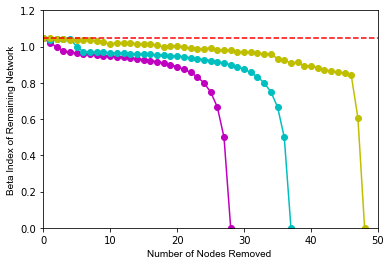

In [4]:
# Beta Index: Progressive removal of nodes
# Purple: degree centrality, Blue: exposure amount, Yellow: Random
plt.plot([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28], [1.049180328,1.019230769,1,0.975,0.96969697,0.964285714,0.961538462,0.958333333,0.954545455,0.95,0.947368421,0.944444444,0.941176471,0.9375,0.933333333,0.928571429,0.923076923,0.916666667,0.909090909,0.9,0.888888889,0.875,0.857142857,0.833333333,0.8,0.75,0.666666667,0.5,0], '-mo')
plt.plot([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37], [1.049180328,1.036363636,1.041666667,1.042553191,1.044444444,1,0.971428571,0.96969697,0.96875,0.967741935,0.966666667,0.964285714,0.962962963,0.961538462,0.96,0.958333333,0.956521739,0.954545455,0.952380952,0.95,0.947368421,0.944444444,0.9375,0.933333333,0.928571429,0.923076923,0.916666667,0.909090909,0.9,0.888888889,0.875,0.857142857,0.833333333,0.8,0.75,0.666666667,0.5,0], '-co')
plt.plot([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48], [1.049180328,1.046705163,1.043325732,1.040797824,1.036111111,1.034535687,1.036146971,1.034981906,1.033214957,1.023658269,1.014527453,1.020185615,1.021598272,1.020293399,1.015511892,1.011786276,1.012904997,1.007323944,0.998524639,1.001518834,1.005084207,0.998011928,0.990230286,0.987382841,0.989090909,0.992075472,0.982534525,0.979140592,0.982811811,0.969411765,0.972543353,0.970677452,0.963317384,0.961111111,0.958935801,0.93397554,0.924839,0.9103952,0.91274920,0.893752,0.894025,0.8829402,0.87293455,0.8637918374,0.8609811,0.852618304,0.8421928,0.606334842,0], '-yo')
plt.plot([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50], [1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328,1.049180328], '--r')
hfont = {'fontname':'Arial'}
plt.ylabel('Beta Index of Remaining Network',**hfont)
plt.xlabel('Number of Nodes Removed ',**hfont)
plt.axis([0, 50, 0, 1.2])
plt.savefig('combined_noderemoval_beta.png', bbox_inches='tight')
plt.show()